# (Effects of Loan Characteristics on Their Status)
## by (Mosta Ashour)

## Investigation Overview

> In this investigation, I wanted to look at the characteristics of loans that could be used to predict their Status whether Completed or Defaulted. The main focus was on the loan term, original loan amount, Borrower's Annual Percentage Rate, and borrower's stated monthly income.

## Dataset Overview

> The dataset consisted of Loan Status and attributes of 113,937 loans. The attributes included loan term, original loan amount, Borrower's Annual Percentage Rate, and much more with 81 variables. 871 data points were removed from the analysis due to duplicates listingKey column which the column should be unique values.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data_path = 'data/3_Loan_data/prosperLoanData.csv'
df = pd.read_csv(data_path)

# adding 'Q' and year from the LoanOriginationQuarter
df[['Q', 'year']] = df.LoanOriginationQuarter.str.split(expand=True)

# convert Term into years
df['Term_y'] = (df.Term/12).astype(int)

## (Distribution of LoanStatus)

> Loan Status in the dataset take on a variety of Loan Status like `Current` with the highest frequenc Status, `Completed` Status with 33.4%, `Chargedoff`, `Defaulted` and `Past Due` Loans.
Plotting a bar for these categorical values, then a pie chart to focus in these two types of Status **'Completed', 'Defaulted'**.

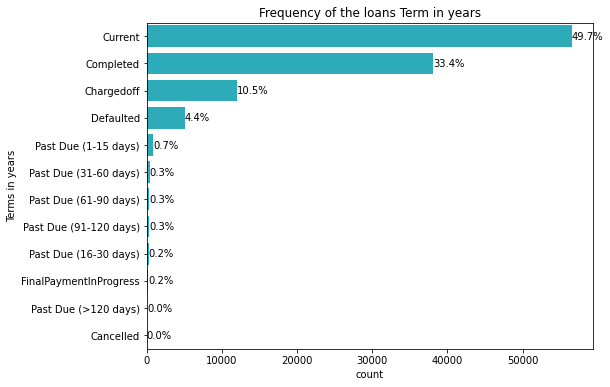

In [3]:
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
base_color = sb.color_palette()[9]
sum_all = df.LoanStatus.value_counts().sum()
type_counts = df.LoanStatus.value_counts()
type_order = df.LoanStatus.value_counts().index


plt.figure(figsize=(8,6))
sb.countplot(data=df, y='LoanStatus', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `LoanStatus` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/sum_all)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1,
             i,
             pct_string,
             va='center')

plt.title('Frequency of the loans Term in years')
plt.ylabel('Terms in years');

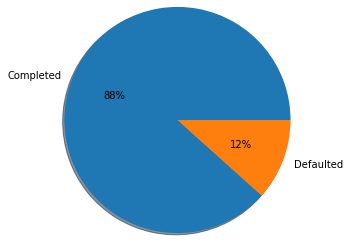

In [4]:
df_ls = df[df.LoanStatus.isin(['Completed', 'Defaulted'])].LoanStatus
labels = list(df_ls.value_counts().index)

plt.pie(df_ls.value_counts(), autopct='%1.0f%%',
        radius=1.3, labels=labels, shadow=True);

## (Distribution of IncomeRange)

> Interestingly, it looks like most of the borrowers asking for loan in the middle range of income between 25k and 75k, but still 75k+ still have a range of borrwers. Under 25k borrowers are less to ask for Laons.

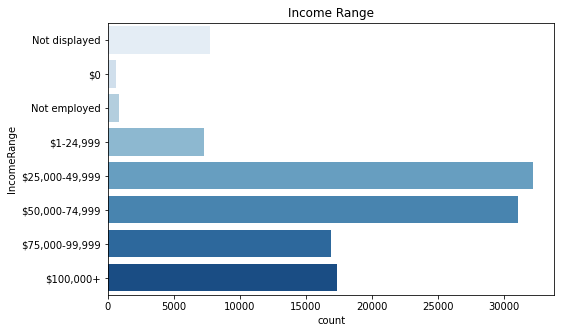

In [5]:
order_type = ['Not displayed','$0', 'Not employed','$1-24,999',
              '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
plt.figure(figsize=(8,5))
sb.countplot(y=df.IncomeRange, palette='Blues', order=order_type)
plt.title("Income Range");

## (Distribution of BorrowerAPR)

> The distribution of BorrowerAPR tend to be symmetric, and roughly multimodal. A small peak centered at 0.1, a large peak contered at 0.18, 0.2 and 0.3. Finally the largest peak centerd at 0.37.

In [6]:
def plot2hist(df, x):
    ''' Plotting two hist with different bins number!
        df= the data frame saved in pd.DataFrame()
        x= the column name we want to plot a hist to'''
    
    # Resize the chart, and have two plots side-by-side
    # Set a larger figure size for subplots
    plt.figure(figsize = [10, 5]) 

    # histogram on left, example of too-large bin size
    # 3 row, 2 cols, subplot 1
    plt.subplot(1, 2, 1) 
    bins = np.arange(0, df[x].max()+df[x].mean()/10, np.round(df[x].mean()/4, 2))
    plt.hist(data=df, x=x, bins=bins)
    plt.xlabel(x)
    plt.title("Distribution of "+x);

    # histogram on right, example of too-small bin size
    plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
    sb.histplot(data = df, x = x)
    plt.title("Distribution of "+x+" in too-small bin size")
    plt.show();

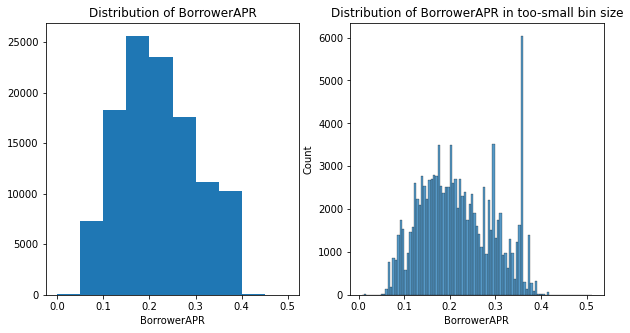

In [7]:
plot2hist(df, 'BorrowerAPR')

## (LoanStatus vs. term)

> We can see that borrowers with one year Term are almost all Completed them Loans without Defaulted with percentage of 99.32%.
Three years term was the worst with 12.36% of Defaulted.

In [8]:
# specify df_new with Loan Status of ['Completed', 'Defaulted']
df_new = df[df.LoanStatus.isin(['Completed', 'Defaulted'])]

# preparing the data to plot in a bar chart
df_new = df_new.groupby(['Term_y']).LoanStatus.value_counts()
df_new = (df_new / df_new.groupby(level=0).sum().rename('perc')).reset_index(name='perc')

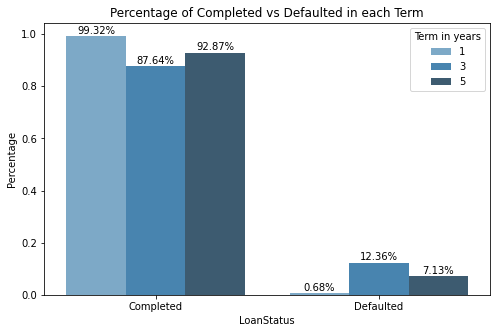

In [9]:
# Let's check the loan status in just these two values 'Completed', 'Defaulted'
# Plotting bar chart for the percentage of each year freq

plt.figure(figsize=(8, 5))
ax = sb.barplot(x="LoanStatus", y="perc", hue='Term_y', data=df_new,
           palette="Blues_d")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{:1.2f}%'.format(height*100),
            ha="center")
ax.legend(title='Term in years')
plt.title("Percentage of Completed vs Defaulted in each Term")
plt.ylabel("Percentage");

## (LoanStatus vs. BorrowerAPR)

>* Interestingly, Defaulted borrowers had a higher median in the BorrowerAPR!
>* First and third quartile shows that the more interest rate is high the less borrowers Complete the Loan.
>* Current Status tend to have BorrowerAPR in the range of 0.18 to 0.22, it's a new range of BorrowerAPR between Defaulted and Completed Loans median.

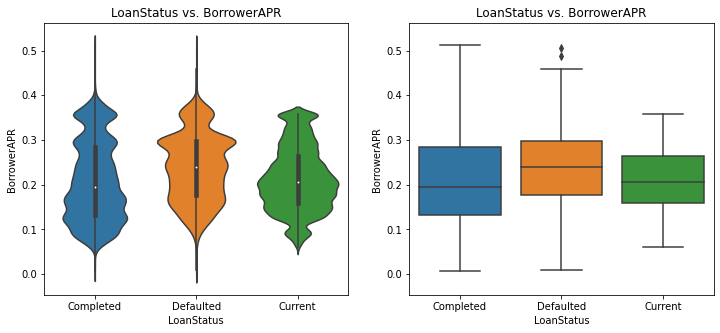

In [10]:
df_new = df[df.LoanStatus.isin(['Completed', 'Defaulted', 'Current'])]
order_status = ['Completed', 'Defaulted', 'Current']

plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[9]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=df_new, x='LoanStatus', y='BorrowerAPR', order=order_status,
                    innner='quartile')
plt.title("LoanStatus vs. BorrowerAPR");

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_new, x='LoanStatus', y='BorrowerAPR', order=order_status);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.title("LoanStatus vs. BorrowerAPR")
plt.show()

## (LoanStatus vs. StatedMonthlyIncome by Time)

>* We can see that there's a slightly increasement in borrower's income who Completed Loans, and decreasement in borrower's income Defaulted.
The year 2009 had a little data in the first and second quarter, 2014 had just Loans in the first quarter and they're all Completed Loans
Current Loans started from 2010 with a slighly increasement in the borrowers monthly income.

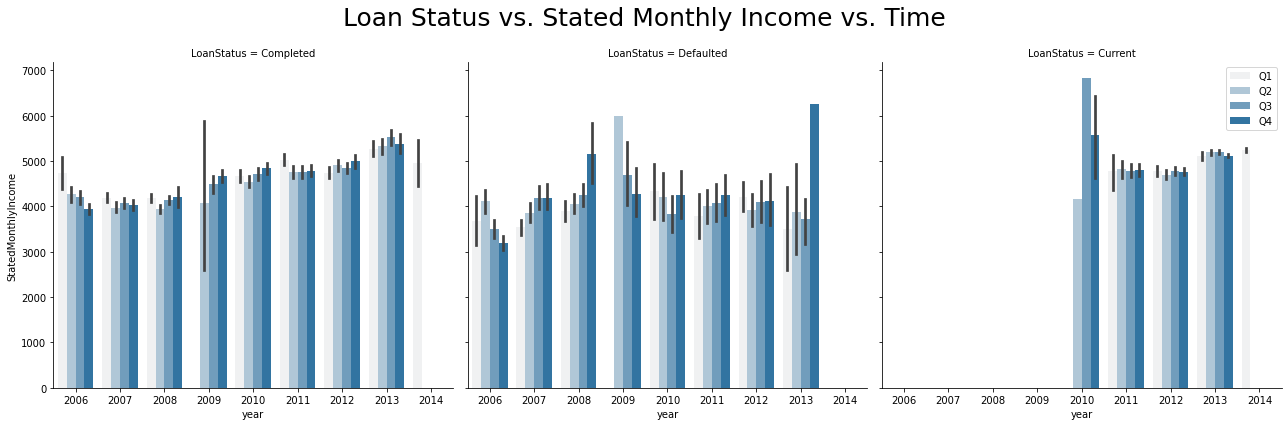

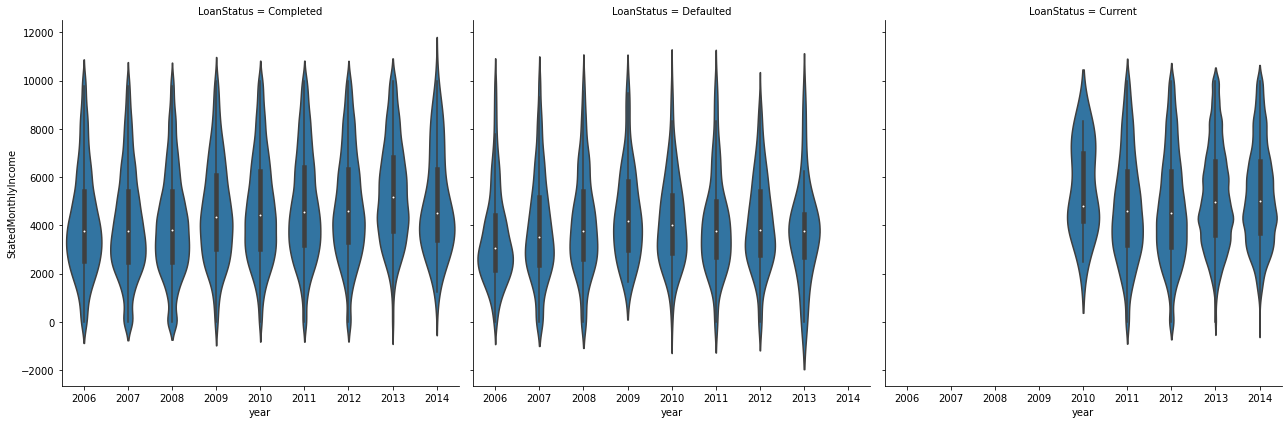

In [11]:
df_new = df[(df.LoanStatus.isin(['Current', 'Completed', 'Defaulted'])) & (df.StatedMonthlyIncome <= 10000) & (df.year != '2005')]

order_type = np.sort(df_new.year.unique())
order_hue = np.sort(df_new.Q.unique())
order_status = ['Completed', 'Defaulted', 'Current']

g = sb.FacetGrid(data = df_new, col = 'LoanStatus', col_order=order_status, height = 6,
                margin_titles = True)
g.map(sb.barplot, 'year', 'StatedMonthlyIncome', 'Q', hue_order=order_hue, order=order_type)
plt.legend()
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Loan Status vs. Stated Monthly Income vs. Time", fontsize=25)
plt.show()

g = sb.FacetGrid(data = df_new, col = 'LoanStatus', col_order=order_status,  height = 6,
                margin_titles = True)
g.map(sb.violinplot, 'year', 'StatedMonthlyIncome', order=order_type);

## (LoanStatus vs. LoanOriginalAmount by Term)

>* For shorter loan 1 year term the Loan Status "Current" had the highest Loan Original Amount, Defaulted was the lowest. For 3 and 5 years Term, borrowers had a higher range of Loan amount, thought the longer term, the bigger amound of Loan.
Current borrowers seems to get lower Loan term than longer.

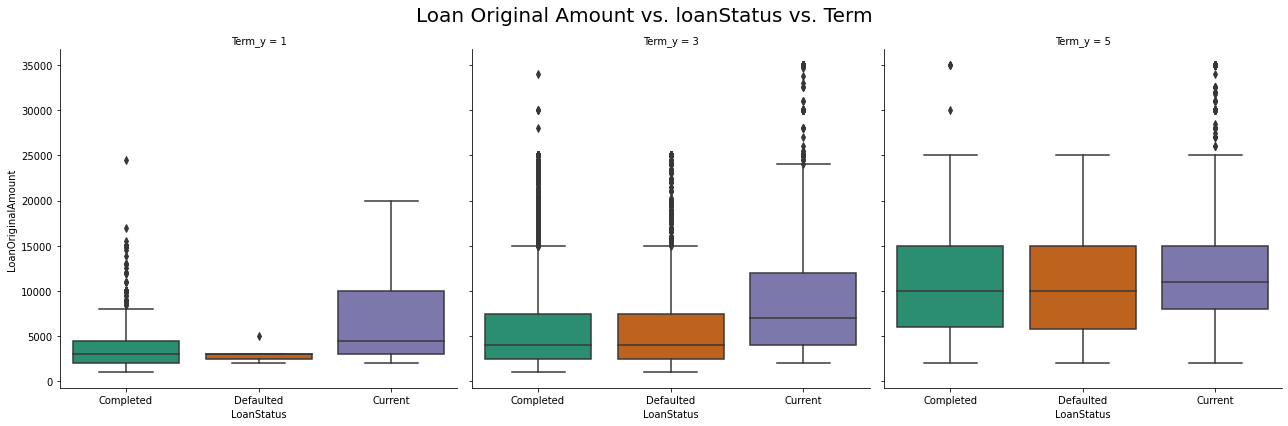

In [12]:
g = sb.FacetGrid(data= df_new, col= 'Term_y', height = 6,
                margin_titles= True)
g.map(sb.boxplot, 'LoanStatus', 'LoanOriginalAmount',
      palette='Dark2', order=['Completed', 'Defaulted', 'Current'])
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("Loan Original Amount vs. loanStatus vs. Term", fontsize=20);